In [1]:
from typing import *
from analysis.core.currency import Currency
from analysis.core.utils import load_data_from_currencies, compute_log_returns
from analysis.core.time_utils import Bounds
from datetime import date


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Current portfolio that we have
existing_portfolio: Dict[Currency, float] = {
    Currency.BTC: 0.6086,
    Currency.ETH: 0.105,
    Currency.XRP: 0.049,
    Currency.SOL: 0.0278,
    Currency.TRX: 0.0066,
    Currency.TON: 0.003,
    Currency.LINK: 0.0535,
    Currency.AAVE: 0.0175,
    Currency.ONDO: 0.0171,
    Currency.ENA: 0.0061,
    Currency.MOVE: 0.0057,
    Currency.HYPE: 0.0232,
    Currency.UNI: 0.0162,
    Currency.TAO: 0.0082,
    Currency.MKR: 0.0024,
    Currency.USDT: 0.0167 * 3
}

<h4>Check portfolios of different BTC/ETH combinations similar to VanEck report</h4>

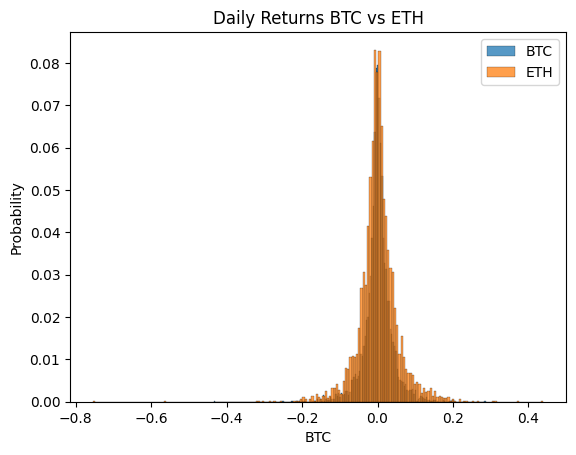

In [2]:
start_date: date = date(2013, 1, 1)
end_date: date = date(2025, 2, 28)
bounds: Bounds = Bounds.for_days(start_date, end_date)
selected_currencies: List[Currency] = [Currency.BTC, Currency.ETH]

df_prices: pd.DataFrame = load_data_from_currencies(bounds=bounds, currencies=selected_currencies)
df_returns: pd.DataFrame = compute_log_returns(df_prices=df_prices)

plt.title("Daily Returns BTC vs ETH")
sns.histplot(df_returns["BTC"], label="BTC", stat="probability")
sns.histplot(df_returns["ETH"], label="ETH", stat="probability")

plt.legend()
plt.show()

<h4>BTC and ETH 60%, 40% allocations</h4>

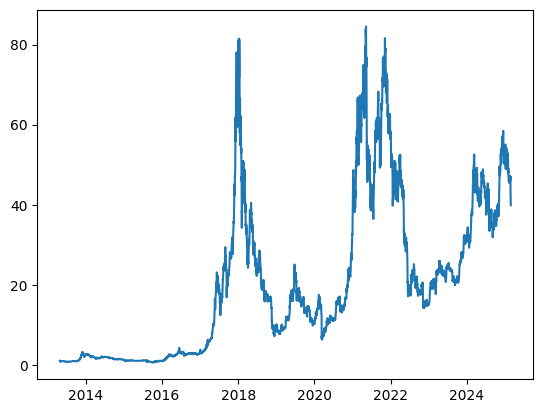

In [3]:
def compute_return_series_for_portfolio(df_returns: pd.DataFrame, portfolio: Dict[Currency, float]) -> pd.Series:
    currencies: List[str] = [currency.name for currency in portfolio]
    weights: np.ndarray = np.array(portfolio.values())

    return (df_returns[currencies] * weights).sum(axis=1)


portfolio_6040: Dict[Currency, float] = {
    Currency.BTC: 0.6, Currency.ETH: 0.4
}

returns: pd.Series = compute_return_series_for_portfolio(df_returns=df_returns, portfolio=portfolio_6040)

plt.plot((1 + returns).cumprod())
plt.show()

<h4>Other allocations of BTC/ETH</h4>

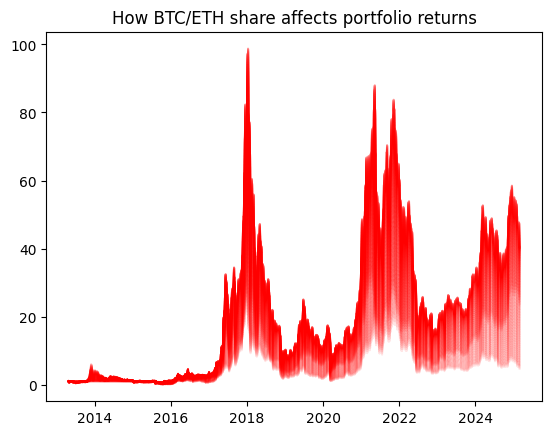

In [4]:
shares: np.ndarray = np.arange(0, 1.01, 0.01)
final_pnl: List[float] = []

for btc_share in np.arange(0, 1.01, 0.01):
    returns: pd.Series = compute_return_series_for_portfolio(
        df_returns=df_returns, 
        portfolio={Currency.BTC: btc_share, Currency.ETH: 1-btc_share}
    )
    final_pnl.append((1 + returns).prod())
    
    plt.plot((1 + returns).cumprod(), color="red", alpha=.1)

plt.title("How BTC/ETH share affects portfolio returns")
plt.show()

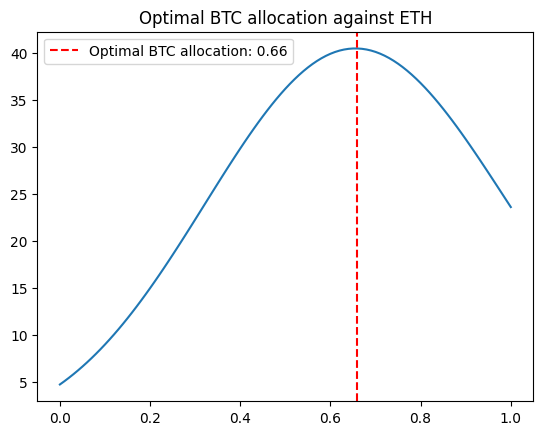

In [5]:
final_pnl = np.array(final_pnl)
optimal_btc_share: float = shares[final_pnl.argmax()]

plt.title("Optimal BTC allocation against ETH")
plt.plot(shares, final_pnl)
plt.axvline(optimal_btc_share, color="red", linestyle="--", label=f"Optimal BTC allocation: {optimal_btc_share}")
plt.legend()
plt.show()

<h4>If we take volatility of returns into account. Max Sharpe portfolio from BTC & ETH</h4>

In [6]:
# compute max sharpe portfolio
from analysis.portfolio_makers.max_sharpe import get_max_sharpe_portfolio

max_sharpe_portfolio: Dict[Currency, float] = get_max_sharpe_portfolio(
    df_returns=df_returns, currencies=[Currency.BTC, Currency.ETH]
)

max_sharpe_portfolio

{<Currency.BTC: 2>: np.float64(0.6050926742340681),
 <Currency.ETH: 4>: np.float64(0.3949073257659318)}

Получаем похожую картинку, что кстати совпадает с нашим существующим портфелем

<h4>Current portfolio in different scenarios</h4>